https://stackoverflow.com/questions/54197831/gridsearch-for-best-model-save-and-load-parameters

https://gist.github.com/willwest/fcb61b110b9f7f59db40

https://www.kaggle.com/grfiv4/displaying-the-results-of-a-grid-search

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import sklearn
from time import time
import warnings
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.feature_selection
from plot_grid_search import grid_search_plot, plot_grid_search_all

X = pd.read_csv("data/X_train.csv", index_col=0).values
y = pd.read_csv('data/y_train.csv', index_col=0).values
y = sklearn.utils.validation.column_or_1d(y)

In [2]:
data_pre = Pipeline([
    ('sim', SimpleImputer()),
    ('var', sklearn.feature_selection.VarianceThreshold()),
    ('scaler', StandardScaler()),
])

reg = Pipeline([
    ('ridge', Ridge())
])

pipeline = Pipeline([
    ('data', data_pre),
    ('reg', reg),
])


In [3]:
param_grid = {
    'data__var__threshold': [0.05, 0.5],
    'data__sim__strategy': ['median', 'mean'],
    'reg__ridge__alpha': np.linspace(1, 10, num=10, dtype=np.int),
}
if __name__ == '__main__':
    warnings.simplefilter(action='ignore', category=FutureWarning)
    warnings.simplefilter(action='ignore', category=DeprecationWarning)

    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='explained_variance', iid=False)
    t0 = time()
    grid_search.fit(X, y)

    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(param_grid.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

done in 22.084s

Best score: -0.519
Best parameters set:
	data__sim__strategy: 'mean'
	data__var__threshold: 0.5
	reg__ridge__alpha: 10


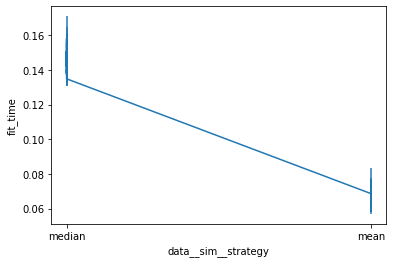

In [4]:
grid_search_plot(grid_search, 'data__sim__strategy', fit_time=True)

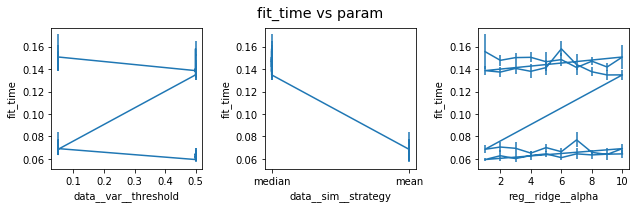

In [5]:
plot_grid_search_all(grid_search, 'test.png', fit_time=1)

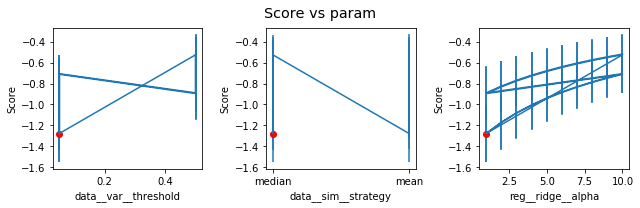

In [6]:
plot_grid_search_all(grid_search, 'test.png', fit_time=0)

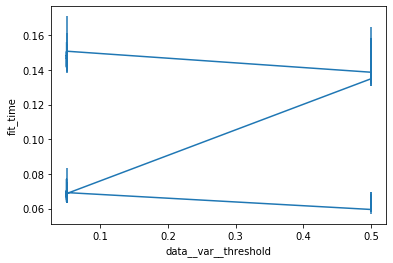

In [8]:
grid_search_plot(grid_search, 'data__var__threshold', fit_time=True)

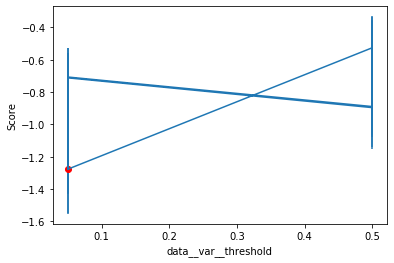

In [9]:
grid_search_plot(grid_search, 'data__var__threshold', fit_time=False)